In [1]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import integrate
from scipy.signal import find_peaks
from scipy.fftpack import fft
from scipy import signal, misc
from scipy.ndimage import gaussian_filter1d

In [2]:
#读取单个的PE loop的文件
df = pd.read_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\Impedance\Arrhenius fitting\Heating\390.09.tab',delimiter='\t',encoding= 'unicode_escape')
df.head(10)

,#4294A_Frequency,E imaginary,E real
0,1000.000,5.371308,65.54919
1,1013.939,5.120639,65.67403
2,1028.073,5.692652,65.17421
3,1042.404,6.095733,66.83374
4,1056.935,5.700363,65.31080
5,1071.668,4.537152,64.55592
6,1086.606,6.324866,65.00294
7,1101.753,5.420907,66.29901
8,1117.111,6.649662,65.30839
9,1132.683,5.144489,65.78429


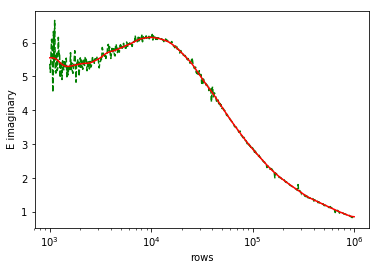

[  2 165]


In [3]:
# 提取 E imaginary 的列
E_ima = df['E imaginary']
# 做smooth，不然 find peak 会很麻烦
E_ima_smooth = gaussian_filter1d(E_ima.iloc[:],6.5) #10代表 smooth的强度，最好是能刚好取出杂峰，又不smooth 太重

plt.plot(df['#4294A_Frequency'],E_ima,'g--')
plt.plot(df['#4294A_Frequency'],E_ima_smooth,'r')
plt.xscale('log')
plt.xlabel('rows')
plt.ylabel('E imaginary')
# plt.xlim((1000,5000))
plt.show()

# find peak
indices = find_peaks(E_ima_smooth, prominence=0)[0]# promince 是调节峰的突起程度，我的峰不太突起，所以设为0
print(indices)

In [5]:
indices[0]
#常见的错误在于：某一个文件的峰找不到
#解决方案是该smooth的强度

IndexError: index 0 is out of bounds for axis 0 with size 0

# Below is the code，above is for breakdown the loop and debug

In [4]:
#从文件名提取温度with regular expression
path = r'C:\PhD-Zipeng\Research projects\DABCO\BF4\Impedance\Arrhenius fitting\Heating'
files = os.listdir(path)
temperature = list()
for file in files:
    if file.endswith(".tab"):
        num = re.findall(r"\d+.\d+", file)
        temperature.append(float(num[0]))
print(temperature)

[297.97, 298.11, 298.27, 298.41, 298.54, 298.68, 298.8, 298.93, 299.05, 299.16, 299.3, 299.42, 299.54, 299.65, 299.77, 299.89, 300.0, 300.12, 300.24, 300.35, 300.48, 300.58, 300.69, 300.81, 300.93, 301.04, 301.15, 301.27, 301.39, 301.5, 301.74, 301.85, 301.96, 302.08, 302.19, 302.31, 302.42, 302.54, 302.65, 302.77, 302.89, 303.0, 303.12, 303.23, 303.34, 303.46, 303.58, 303.7, 303.81, 303.92, 304.04, 304.16, 304.27, 304.39, 304.5, 304.63, 304.74, 304.84, 304.96, 305.07, 305.19, 305.31, 305.42, 305.54, 305.65, 305.76, 305.88, 306.0, 306.12, 306.24, 306.35, 306.46, 306.57, 306.69, 306.81, 306.92, 307.06, 307.14, 307.26, 307.37, 307.49, 307.61, 307.72, 307.83, 307.94, 308.08, 308.19, 308.3, 308.4, 308.53, 308.65, 308.76, 308.87, 308.97, 309.12, 309.25, 309.33, 309.46, 309.57, 309.69, 309.8, 309.92, 310.04, 310.13, 310.27, 310.37, 310.49, 310.61, 310.72, 310.82, 310.95, 311.07, 311.18, 311.3, 311.41, 311.54, 311.64, 311.76, 311.85, 311.99, 312.11, 312.22, 312.34, 312.45, 312.57, 312.69, 312

# E2 no smooth

In [5]:
#批量操作所有文件
path = r'C:\PhD-Zipeng\Research projects\DABCO\BF4\Impedance\Arrhenius fitting\Heating'

files = glob(path + "/*.tab")


dt=pd.DataFrame()

# lst_T=list()
# lst_E2=list()
i = 0


for file in files:
    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    E_ima = df['E imaginary']
    E_ima_smooth = gaussian_filter1d(E_ima.iloc[:], 10.2)
    dt.insert(i, str(temperature[i]),E_ima )
    i = i+1

  
dt.head(10)


,297.97,298.11,298.27,298.41,298.54,298.68,298.8,298.93,299.05,299.16,...,429.29,429.33,429.44,429.47,429.78,429.85,429.96,429.99,430.08,430.22
0,0.168094,0.471859,0.703912,0.543192,0.716216,0.077248,1.390619,0.106547,0.506144,0.313512,...,14.62262,15.06397,15.45590,14.57867,14.15268,14.60415,14.84254,14.50623,14.40305,15.02640
1,1.421352,-0.052269,-0.047391,1.459234,1.417195,1.636740,1.539689,0.670678,1.214215,0.741232,...,14.41523,14.42592,14.51283,14.81508,14.27776,15.16811,14.26610,14.44567,15.82917,14.43808
2,1.004209,2.102662,1.060787,1.136525,1.079980,1.469450,0.366964,1.531584,1.855312,1.793210,...,14.14430,13.93411,14.35980,14.25237,14.70898,15.03208,14.85293,15.00486,15.28541,14.98062
3,0.672721,1.278273,0.546299,0.181769,0.973463,0.035394,1.140308,0.155547,1.002657,0.186078,...,14.27459,14.11370,14.73746,15.14945,14.40560,13.91291,14.22489,14.61664,13.84423,15.03069
4,0.778123,1.343040,0.959992,1.288206,1.738350,1.803233,0.837105,1.394018,1.694644,1.093812,...,14.22096,13.86533,13.34440,14.41598,14.25477,14.51194,14.34404,14.27020,14.44880,14.42610
5,1.007735,1.074661,-0.436436,1.852555,0.257598,0.739896,0.738087,1.037234,0.597577,1.636245,...,13.63114,13.90134,13.53355,13.44449,13.61414,14.21836,13.73986,13.76310,14.51105,14.41148
6,0.499689,1.023232,1.027420,0.882278,0.322548,0.314312,0.880620,0.807035,0.153555,0.872038,...,14.41164,13.84546,14.13592,13.86631,14.55516,13.26847,14.81249,14.18980,13.76677,14.69707
7,0.433858,0.334920,0.468582,1.166869,-0.193469,0.626999,1.090477,0.755135,-0.247272,0.521125,...,13.78786,14.35879,13.87650,14.01593,14.07120,12.93891,13.32422,13.28199,13.49578,14.05696
8,0.533197,0.666707,1.042683,-0.436115,0.654541,0.480294,0.790720,0.718187,0.876689,0.341534,...,13.24794,13.40305,13.78729,13.87353,14.03360,13.60535,13.32124,14.00727,13.37778,14.12930
9,1.423208,1.297754,0.578283,1.197748,1.710972,1.349773,1.175529,0.841833,1.776174,1.265807,...,12.68765,13.22572,12.53294,13.66102,12.97473,14.29434,13.30537,13.95614,13.91132,12.68221


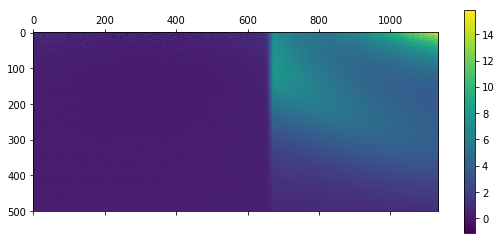

In [6]:
mpl.pyplot.matshow(dt,cmap='viridis')
# plt.axis([58,70,0,10])
plt.colorbar()
# ax.set_xscale('log')
plt.show()

In [7]:
dt.insert(0,'f',df['#4294A_Frequency'])
dt.shape
dt.head()

,f,297.97,298.11,298.27,298.41,298.54,298.68,298.8,298.93,299.05,...,429.29,429.33,429.44,429.47,429.78,429.85,429.96,429.99,430.08,430.22
0,1000.000,0.168094,0.471859,0.703912,0.543192,0.716216,0.077248,1.390619,0.106547,0.506144,...,14.62262,15.06397,15.45590,14.57867,14.15268,14.60415,14.84254,14.50623,14.40305,15.02640
1,1013.939,1.421352,-0.052269,-0.047391,1.459234,1.417195,1.636740,1.539689,0.670678,1.214215,...,14.41523,14.42592,14.51283,14.81508,14.27776,15.16811,14.26610,14.44567,15.82917,14.43808
2,1028.073,1.004209,2.102662,1.060787,1.136525,1.079980,1.469450,0.366964,1.531584,1.855312,...,14.14430,13.93411,14.35980,14.25237,14.70898,15.03208,14.85293,15.00486,15.28541,14.98062
3,1042.404,0.672721,1.278273,0.546299,0.181769,0.973463,0.035394,1.140308,0.155547,1.002657,...,14.27459,14.11370,14.73746,15.14945,14.40560,13.91291,14.22489,14.61664,13.84423,15.03069
4,1056.935,0.778123,1.343040,0.959992,1.288206,1.738350,1.803233,0.837105,1.394018,1.694644,...,14.22096,13.86533,13.34440,14.41598,14.25477,14.51194,14.34404,14.27020,14.44880,14.42610


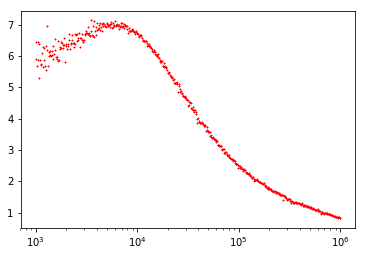

In [8]:
plt.plot(dt['f'],dt['382.88'],'r+',linewidth=1, markersize=2)
plt.xscale("log")
plt.show()

In [23]:
dt.to_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\New impedance low to 40Hz\E2_f_T heating_1.csv')

# E1 no smooth

In [9]:
#批量操作所有文件
path = r'C:\PhD-Zipeng\Research projects\DABCO\BF4\Impedance\Arrhenius fitting\Heating'

files = glob(path + "/*.tab")


dt=pd.DataFrame()

# lst_T=list()
# lst_E2=list()
i = 0


for file in files:
    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    E_real = df['E real']
    E_real_smooth = gaussian_filter1d(E_real.iloc[:], 10.2)
    dt.insert(i, str(temperature[i]),E_real )
    i = i+1

  
dt.head(10)


,297.97,298.11,298.27,298.41,298.54,298.68,298.8,298.93,299.05,299.16,...,429.29,429.33,429.44,429.47,429.78,429.85,429.96,429.99,430.08,430.22
0,24.25686,24.21829,25.00559,24.28811,25.38086,24.84999,25.03090,24.85504,26.39734,24.86193,...,50.66155,49.96401,50.60032,50.63343,50.92225,51.71735,50.00515,51.00091,51.34501,50.84677
1,24.67347,25.58262,25.24062,24.28845,24.99786,24.61301,24.70242,23.75032,24.38954,24.29335,...,51.84684,50.33972,50.71596,51.92856,51.41818,50.69101,50.28748,51.54207,50.42314,50.63744
2,25.51867,25.80560,24.50843,25.20875,24.20828,24.82538,24.97533,25.16690,23.90910,25.47156,...,50.36535,50.68285,50.58195,50.87972,50.90677,49.36936,50.94167,50.04379,50.78048,50.95172
3,24.65307,25.08056,26.12025,23.72941,24.70032,24.54616,24.21555,24.03899,24.99169,24.75962,...,51.83177,50.48562,51.09811,51.17959,51.59740,50.35454,51.07483,51.71020,49.31903,51.10730
4,25.49114,25.39913,24.71112,24.82664,24.62326,24.85295,24.52029,24.62118,24.73220,25.15265,...,50.53032,50.78527,50.96193,50.88994,50.86799,50.48405,50.98969,50.35829,50.28095,50.97420
5,24.20183,24.78834,24.40570,24.25710,24.73941,24.61714,25.18306,25.52213,24.24647,24.47927,...,49.70919,51.21325,50.20522,50.67939,50.94122,50.41858,50.08229,49.94335,50.96781,50.56637
6,24.99503,23.94170,24.13639,25.91559,24.67590,24.67130,24.35939,24.73344,25.21701,24.76329,...,50.87728,50.09729,51.04323,50.03824,51.03631,49.87513,51.20447,50.39507,50.36395,50.86761
7,24.50436,24.20355,25.02624,24.58695,25.26156,24.52072,25.27148,24.30837,24.43550,23.75290,...,50.35947,51.31790,50.11618,50.41631,50.32658,50.72082,50.81011,49.92241,49.96185,50.42230
8,24.78921,24.63067,24.68930,24.48096,25.06430,25.05917,24.80771,24.81643,25.08515,25.48571,...,51.63050,50.19382,50.27783,51.10212,51.12107,50.83725,51.22770,51.15109,49.44626,50.73825
9,24.74111,25.44390,25.12456,23.97367,23.91538,24.48388,24.65381,24.73422,24.56547,24.98569,...,50.50723,50.73892,49.28163,50.47788,50.42177,50.76423,50.36245,50.23826,50.94805,50.63755


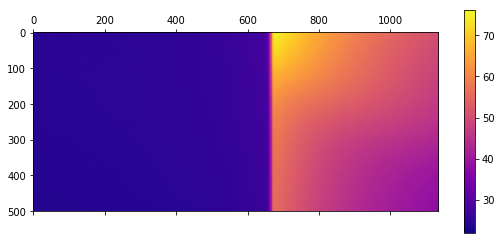

In [11]:
mpl.pyplot.matshow(dt,cmap='plasma')
# plt.axis([58,70,0,10])
plt.colorbar()
# ax.set_xscale('log')
plt.show()

In [12]:
dt.insert(0,'f',df['#4294A_Frequency'])
dt.shape
dt.head()


,f,297.97,298.11,298.27,298.41,298.54,298.68,298.8,298.93,299.05,...,429.29,429.33,429.44,429.47,429.78,429.85,429.96,429.99,430.08,430.22
0,1000.000,24.25686,24.21829,25.00559,24.28811,25.38086,24.84999,25.03090,24.85504,26.39734,...,50.66155,49.96401,50.60032,50.63343,50.92225,51.71735,50.00515,51.00091,51.34501,50.84677
1,1013.939,24.67347,25.58262,25.24062,24.28845,24.99786,24.61301,24.70242,23.75032,24.38954,...,51.84684,50.33972,50.71596,51.92856,51.41818,50.69101,50.28748,51.54207,50.42314,50.63744
2,1028.073,25.51867,25.80560,24.50843,25.20875,24.20828,24.82538,24.97533,25.16690,23.90910,...,50.36535,50.68285,50.58195,50.87972,50.90677,49.36936,50.94167,50.04379,50.78048,50.95172
3,1042.404,24.65307,25.08056,26.12025,23.72941,24.70032,24.54616,24.21555,24.03899,24.99169,...,51.83177,50.48562,51.09811,51.17959,51.59740,50.35454,51.07483,51.71020,49.31903,51.10730
4,1056.935,25.49114,25.39913,24.71112,24.82664,24.62326,24.85295,24.52029,24.62118,24.73220,...,50.53032,50.78527,50.96193,50.88994,50.86799,50.48405,50.98969,50.35829,50.28095,50.97420


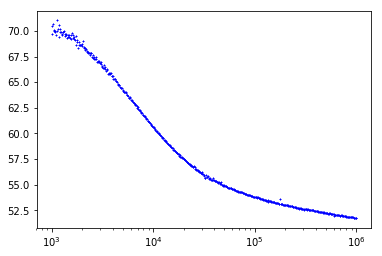

In [13]:
plt.plot(dt['f'],dt['382.88'],'b+',linewidth=1, markersize=2)
plt.xscale("log")
plt.show()

In [28]:
dt.to_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\No16_2x42mm2_250um\Impedance data 3D\E1_f_T heating_nosmooth.csv')

In [14]:
#批量操作所有文件
path = r'C:\PhD-Zipeng\Research projects\DABCO\BF4\Impedance\Arrhenius fitting\Heating'

files = glob(path + "/*.tab")


dt=pd.DataFrame()

# lst_T=list()
# lst_E2=list()
i = 0


for file in files:
    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    E_ima = df['E imaginary']
    E_real = df['E real']
    Loss_tan = E_ima/E_real
    dt.insert(i, str(temperature[i]),Loss_tan )
    i = i+1

  
dt.head(10)

,297.97,298.11,298.27,298.41,298.54,298.68,298.8,298.93,299.05,299.16,...,429.29,429.33,429.44,429.47,429.78,429.85,429.96,429.99,430.08,430.22
0,0.006930,0.019484,0.028150,0.022365,0.028219,0.003109,0.055556,0.004287,0.019174,0.012610,...,0.288633,0.301496,0.305451,0.287926,0.277927,0.282384,0.296820,0.284431,0.280515,0.295523
1,0.057606,-0.002043,-0.001878,0.060079,0.056693,0.066499,0.062329,0.028239,0.049784,0.030512,...,0.278035,0.286571,0.286159,0.285297,0.277679,0.299227,0.283691,0.280269,0.313927,0.285127
2,0.039352,0.081481,0.043283,0.045085,0.044612,0.059191,0.014693,0.060857,0.077599,0.070400,...,0.280834,0.274928,0.283892,0.280119,0.288940,0.304482,0.291567,0.299835,0.301010,0.294016
3,0.027288,0.050967,0.020915,0.007660,0.039411,0.001442,0.047090,0.006471,0.040120,0.007515,...,0.275402,0.279559,0.288415,0.296006,0.279192,0.276299,0.278511,0.282665,0.280708,0.294101
4,0.030525,0.052877,0.038849,0.051888,0.070598,0.072556,0.034139,0.056619,0.068520,0.043487,...,0.281434,0.273019,0.261850,0.283278,0.280231,0.287456,0.281313,0.283373,0.287361,0.283008
5,0.041639,0.043353,-0.017883,0.076372,0.010412,0.030056,0.029309,0.040641,0.024646,0.066842,...,0.274218,0.271440,0.269565,0.265285,0.267252,0.282006,0.274346,0.275574,0.284710,0.285001
6,0.019992,0.042738,0.042567,0.034044,0.013071,0.012740,0.036151,0.032629,0.006089,0.035215,...,0.283263,0.276371,0.276940,0.277114,0.285192,0.266034,0.289281,0.281571,0.273346,0.288928
7,0.017705,0.013838,0.018724,0.047459,-0.007659,0.025570,0.043151,0.031065,-0.010119,0.021939,...,0.273789,0.279801,0.276887,0.278004,0.279598,0.255101,0.262236,0.266053,0.270122,0.278785
8,0.021509,0.027068,0.042232,-0.017814,0.026114,0.019166,0.031874,0.028940,0.034949,0.013401,...,0.256591,0.267026,0.274222,0.271486,0.274517,0.267626,0.260040,0.273841,0.270552,0.278474
9,0.057524,0.051005,0.023017,0.049961,0.071543,0.055129,0.047681,0.034035,0.072304,0.050661,...,0.251205,0.260662,0.254313,0.270634,0.257324,0.281583,0.264192,0.277799,0.273049,0.250451


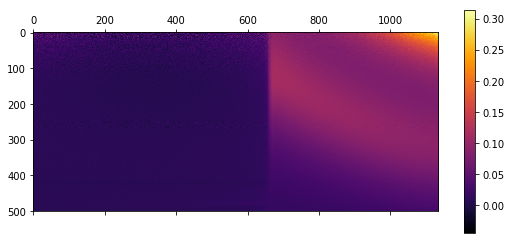

In [17]:
# Loss tan 3D plot
mpl.pyplot.matshow(dt,cmap='inferno')
# plt.axis([58,70,0,10])
plt.colorbar()
# ax.set_xscale('log')
plt.show()

In [18]:
dt.insert(0,'f',df['#4294A_Frequency'])
dt.shape
dt.head()

,f,297.97,298.11,298.27,298.41,298.54,298.68,298.8,298.93,299.05,...,429.29,429.33,429.44,429.47,429.78,429.85,429.96,429.99,430.08,430.22
0,1000.000,0.006930,0.019484,0.028150,0.022365,0.028219,0.003109,0.055556,0.004287,0.019174,...,0.288633,0.301496,0.305451,0.287926,0.277927,0.282384,0.296820,0.284431,0.280515,0.295523
1,1013.939,0.057606,-0.002043,-0.001878,0.060079,0.056693,0.066499,0.062329,0.028239,0.049784,...,0.278035,0.286571,0.286159,0.285297,0.277679,0.299227,0.283691,0.280269,0.313927,0.285127
2,1028.073,0.039352,0.081481,0.043283,0.045085,0.044612,0.059191,0.014693,0.060857,0.077599,...,0.280834,0.274928,0.283892,0.280119,0.288940,0.304482,0.291567,0.299835,0.301010,0.294016
3,1042.404,0.027288,0.050967,0.020915,0.007660,0.039411,0.001442,0.047090,0.006471,0.040120,...,0.275402,0.279559,0.288415,0.296006,0.279192,0.276299,0.278511,0.282665,0.280708,0.294101
4,1056.935,0.030525,0.052877,0.038849,0.051888,0.070598,0.072556,0.034139,0.056619,0.068520,...,0.281434,0.273019,0.261850,0.283278,0.280231,0.287456,0.281313,0.283373,0.287361,0.283008


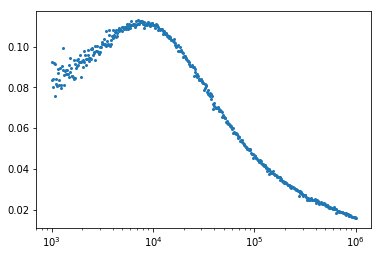

In [23]:
plt.plot(dt['f'],dt['382.88'],'o',linewidth=1, markersize=2)
plt.xscale("log")
plt.show()

# Smooth E2 and E1

In [29]:
#批量操作所有文件
path = r'C:\PhD-Zipeng\Research projects\DABCO\BF4\Impedance\Arrhenius fitting\Heating'

files = glob(path + "/*.tab")


dt=pd.DataFrame()

# lst_T=list()
# lst_E2=list()
i = 0


for file in files:
    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    E_ima = df['E imaginary']
    E_ima_smooth = gaussian_filter1d(E_ima.iloc[:], 10.2)
    dt.insert(i, str(temperature[i]),E_ima_smooth )
    i = i+1

  
dt.head(10)


,297.97,298.11,298.27,298.41,298.54,298.68,298.8,298.93,299.05,299.16,...,429.29,429.33,429.44,429.47,429.78,429.85,429.96,429.99,430.08,430.22
0,0.785676,0.965235,0.590136,0.922347,0.847896,0.857388,0.912652,0.821121,0.923594,0.872641,...,13.490629,13.496450,13.583733,13.657295,13.601092,13.735294,13.658018,13.736332,13.775103,13.859188
1,0.785659,0.964537,0.590201,0.921260,0.847063,0.857267,0.910932,0.820784,0.922525,0.872182,...,13.479142,13.485736,13.572214,13.645485,13.590466,13.724069,13.647020,13.724903,13.762939,13.846621
2,0.785620,0.963123,0.590322,0.919093,0.845390,0.857025,0.907523,0.820092,0.920396,0.871251,...,13.456293,13.464449,13.549304,13.621994,13.569323,13.701727,13.625141,13.702153,13.738761,13.821631
3,0.785547,0.960967,0.590479,0.915869,0.842910,0.856653,0.902473,0.819020,0.917230,0.869833,...,13.422359,13.432818,13.515265,13.587100,13.537901,13.668472,13.592627,13.668308,13.702859,13.784516
4,0.785437,0.958040,0.590628,0.911618,0.839650,0.856120,0.895851,0.817532,0.913064,0.867912,...,13.377712,13.391198,13.470490,13.541195,13.496535,13.624617,13.549838,13.623686,13.655670,13.735700
5,0.785269,0.954290,0.590735,0.906369,0.835645,0.855408,0.887751,0.815594,0.907945,0.865451,...,13.322851,13.340050,13.415465,13.484785,13.445650,13.570561,13.497225,13.568711,13.597743,13.675738
6,0.785025,0.949672,0.590750,0.900171,0.830944,0.854485,0.878288,0.813144,0.901920,0.862408,...,13.258373,13.279898,13.350778,13.418473,13.385770,13.506776,13.435344,13.503888,13.529732,13.605290
7,0.784690,0.944138,0.590638,0.893073,0.825586,0.853308,0.867609,0.810158,0.895055,0.858755,...,13.184949,13.211366,13.277087,13.342946,13.317471,13.433812,13.364820,13.429799,13.452385,13.525103
8,0.784226,0.937652,0.590330,0.885136,0.819611,0.851845,0.855845,0.806594,0.887408,0.854450,...,13.103325,13.135086,13.195123,13.258944,13.241399,13.352258,13.286334,13.347094,13.366507,13.435987
9,0.783603,0.930166,0.589795,0.876430,0.813063,0.850044,0.843167,0.802421,0.879050,0.849460,...,13.014296,13.051747,13.105660,13.167259,13.158219,13.262760,13.200613,13.256464,13.272935,13.338823


In [30]:
dt.insert(0,'f',df['#4294A_Frequency'])
dt.shape
dt.head()


,f,297.97,298.11,298.27,298.41,298.54,298.68,298.8,298.93,299.05,...,429.29,429.33,429.44,429.47,429.78,429.85,429.96,429.99,430.08,430.22
0,1000.000,0.785676,0.965235,0.590136,0.922347,0.847896,0.857388,0.912652,0.821121,0.923594,...,13.490629,13.496450,13.583733,13.657295,13.601092,13.735294,13.658018,13.736332,13.775103,13.859188
1,1013.939,0.785659,0.964537,0.590201,0.921260,0.847063,0.857267,0.910932,0.820784,0.922525,...,13.479142,13.485736,13.572214,13.645485,13.590466,13.724069,13.647020,13.724903,13.762939,13.846621
2,1028.073,0.785620,0.963123,0.590322,0.919093,0.845390,0.857025,0.907523,0.820092,0.920396,...,13.456293,13.464449,13.549304,13.621994,13.569323,13.701727,13.625141,13.702153,13.738761,13.821631
3,1042.404,0.785547,0.960967,0.590479,0.915869,0.842910,0.856653,0.902473,0.819020,0.917230,...,13.422359,13.432818,13.515265,13.587100,13.537901,13.668472,13.592627,13.668308,13.702859,13.784516
4,1056.935,0.785437,0.958040,0.590628,0.911618,0.839650,0.856120,0.895851,0.817532,0.913064,...,13.377712,13.391198,13.470490,13.541195,13.496535,13.624617,13.549838,13.623686,13.655670,13.735700


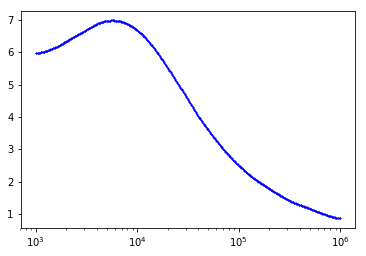

In [31]:

plt.plot(dt['f'],dt['382.88'],'b+',linewidth=1, markersize=2)
plt.xscale("log")
plt.show()

In [32]:
dt.to_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\No16_2x42mm2_250um\Impedance data 3D\E2_f_T heating_Guassian10x2smooth.csv')

In [45]:
#批量操作所有文件
path = r'C:\PhD-Zipeng\Research projects\DABCO\BF4\Impedance\Arrhenius fitting\Heating'

files = glob(path + "/*.tab")


dt=pd.DataFrame()

# lst_T=list()
# lst_E2=list()
i = 0


for file in files:
    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    E_real = df['E real']
    E_real_smooth = gaussian_filter1d(E_real.iloc[:], 10)
    dt.insert(i, str(temperature[i]),E_real_smooth )
    i = i+1

dt.insert(0,'f',df['#4294A_Frequency'])
dt.shape  
dt.head(10)

,f,297.97,298.11,298.27,298.41,298.54,298.68,298.8,298.93,299.05,...,429.29,429.33,429.44,429.47,429.78,429.85,429.96,429.99,430.08,430.22
0,1000.000,24.788910,24.849507,24.838862,24.623358,24.765491,24.739197,24.822304,24.699293,24.746281,...,50.682602,50.496745,50.487272,50.749014,50.735805,50.512618,50.504593,50.577232,50.439482,50.576402
1,1013.939,24.788780,24.847915,24.837322,24.624501,24.765497,24.739779,24.822311,24.699999,24.745593,...,50.680101,50.495818,50.485181,50.746476,50.730935,50.512196,50.502121,50.574342,50.438491,50.572892
2,1028.073,24.788518,24.844773,24.834276,24.626765,24.765517,24.740934,24.822298,24.701391,24.744230,...,50.675140,50.493954,50.481041,50.741438,50.721276,50.511341,50.497212,50.568592,50.436499,50.565928
3,1042.404,24.788117,24.840169,24.829783,24.630115,24.765573,24.742636,24.822225,24.703422,24.742273,...,50.667811,50.491162,50.474931,50.733976,50.707013,50.510014,50.489918,50.560072,50.433488,50.555645
4,1056.935,24.787567,24.834235,24.823908,24.634491,24.765678,24.744854,24.822024,24.706028,24.739800,...,50.658235,50.487443,50.466961,50.724196,50.688415,50.508167,50.480347,50.548890,50.429410,50.542220
5,1071.668,24.786867,24.827141,24.816758,24.639822,24.765869,24.747534,24.821618,24.709131,24.736923,...,50.646566,50.482775,50.457279,50.712243,50.665817,50.505733,50.468604,50.535209,50.424231,50.525886
6,1086.606,24.786008,24.819064,24.808459,24.646008,24.766163,24.750641,24.820912,24.712639,24.733763,...,50.632992,50.477180,50.446049,50.698273,50.639620,50.502642,50.454846,50.519207,50.417906,50.506907
7,1101.753,24.784999,24.810206,24.799143,24.652955,24.766583,24.754093,24.819815,24.716453,24.730452,...,50.617718,50.470666,50.433454,50.682462,50.610286,50.498812,50.439235,50.501082,50.410383,50.485601
8,1117.111,24.783817,24.800794,24.788973,24.660545,24.767161,24.757827,24.818246,24.720469,24.727119,...,50.600952,50.463230,50.419687,50.665007,50.578294,50.494165,50.421953,50.481066,50.401630,50.462290
9,1132.683,24.782471,24.791033,24.778108,24.668652,24.767891,24.761758,24.816120,24.724577,24.723892,...,50.582907,50.454896,50.404934,50.646109,50.544157,50.488618,50.403193,50.459390,50.391604,50.437301


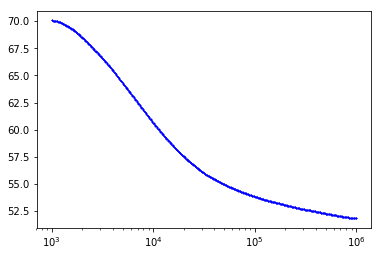

In [46]:

plt.plot(dt['f'],dt['382.88'],'b+',linewidth=1, markersize=2)
plt.xscale("log")
plt.show()

In [47]:
dt.to_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\No16_2x42mm2_250um\Impedance data 3D\E1_f_T heating_Guassian10smooth.csv')